In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять только первые 1000000 строк.

In [ ]:
transactions = pd.read_csv( "/content/drive/MyDrive/transactions.csv", sep=',',nrows = 1000000)
tr_mcc_codes = pd.read_csv("/content/drive/MyDrive/tr_mcc_codes.csv", sep=';')
tr_types = pd.read_csv("/content/drive/MyDrive/tr_types.csv", sep=';')
customers_gender_train = pd.read_csv("/content/drive/MyDrive/gender_train.csv", sep=',')


Task 5.

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner. После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
df = pd.merge(transactions, customers_gender_train, how='left')
df = pd.merge(df, tr_types, how='inner')
df = pd.merge(df, tr_mcc_codes, how='inner')

print(df)

        customer_id   tr_datetime  mcc_code  tr_type    amount   term_id  \
0          39026145    0 10:23:26      4814     1030  -2245.92       NaN   
1          39026145    6 07:08:31      4814     1030  -5614.79       NaN   
2          39026145    8 07:06:10      4814     1030  -1122.96       NaN   
3          39026145   11 08:49:03      4814     1030  -2245.92       NaN   
4          39026145   11 14:12:08      4814     1030  -2245.92       NaN   
...             ...           ...       ...      ...       ...       ...   
999579     48819028  388 00:00:00      7993     1200  -8062.84  00000000   
999580     32478197  254 00:00:00      7993     1200  -5367.74  00000181   
999581     32478197  254 00:00:00      7993     1200  -5816.92  00000181   
999582     89619970   21 00:00:00      7993     1200 -67355.01       NaN   
999583     89619970   84 00:00:00      7993     1200 -25805.57       NaN   

        gender                  tr_description  \
0          1.0  Оплата услуги. Банком

Task 6.

Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Представьте ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

Пояснения:
(*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(**) Обратите внимание, что для вычисления модуля разности точных знаний о том,
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [ ]:
only_spending = df[df['amount'] < 0] # df только с тратами

avg1= only_spending[only_spending['gender'] == 1]['amount'].mean() # среднее гендера 1
avg2 = only_spending[only_spending['gender'] == 0]['amount'].mean()

print(f"Модуль разницы трат: {abs(avg1 - avg2):.2f}") # разница

Модуль разницы трат: 32718.05


Task 7:

Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (*)
Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10.
Определите отношение максимальной дисперсии к минимальной.
Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

Пояснения:
(*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [ ]:
df['mcc_code+tr_type'] = df['mcc_code'].astype(str) + df['tr_type'].astype(str) # создание mcc_code+tr_type

only_spending = df[df['amount'] < 0] # df только с тратами

dispersion = only_spending.groupby('mcc_code+tr_type')['amount'].agg(['var', 'count']) # подсчет дисперсии по категориям

dispersion2 = dispersion[dispersion['count'] >= 10] # наблюдений >= 10

min_dispersion2 = dispersion2['var'].min() # отношения максимальной дисперсии к минимальной
max_dispersion2 = dispersion2['var'].max()
rat = round(max_dispersion2 / min_dispersion2)

print(f"Разница дисперсий: {rat}")

Разница дисперсий: 9170599


Task 8:

По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (*)
Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
1) Покупка. POS ТУ СБ РФ
2) Списание после проведения претензионной работы
3) Плата за получение наличных. Россия
4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте
5) Плата за получение наличных в АТМ. Россия
6) Наличные. Зарубеж. банк
7) Возврат покупки. POS ТУ Россия
Пояснения:
(*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [ ]:
only_profit = df[df["amount"] > 0] # df только с прибылью

max_income = only_profit.groupby(["gender", "tr_type", "tr_description"])["amount"].max().reset_index() # находим максимальные значения
print(f"Максимальное значений у 0: {max_income[max_income['gender'] == 0].groupby('gender')['amount'].max().loc[0]}") # выводим максимальные значения для мужчин и женщин
print(f"Максимальное значений у 1: {max_income[max_income['gender'] == 1] .groupby('gender')['amount'].max().loc[1]}")

max_income_0 = max_income[max_income["gender"] == 0]# разделяем мужчин и женщин
max_income_1 = max_income[max_income["gender"] == 1]

min_income_0 = max_income_0.groupby("gender").apply(lambda x: x.nsmallest(5, "amount")).reset_index(drop=True) # выделяем 2 наименьшие прибыли
min_income_1 = max_income_1.groupby("gender").apply(lambda x: x.nsmallest(5, "amount")).reset_index(drop=True)
print(f"\nМинмальное значений у 0:\n{min_income_0['amount']}")
print(f"\nМинмальное значений у 1:\n{min_income_1['amount']}")

descriptions = [ # список с ответом на вопрос
    'Покупка. POS ТУ СБ РФ', 'Списание после проведения претензионной работы', 'Плата за получение наличных. Россия',
    'Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте', 'Плата за получение наличных в АТМ. Россия',
    'Наличные. Зарубеж. банк', 'Возврат покупки. POS ТУ Россия']

same_transactions = min_income_0[min_income_0["tr_description"].isin(descriptions) & min_income_1["tr_description"].isin(descriptions)] # если ответ есть в столюце tr_description у обоих, то прибыль гендера 0 заносится в новый датафрэйм

print(f"\nОдинаковые транзакции:\n{same_transactions['tr_description']}")

Максимальное значений у 0: 67377473.16
Максимальное значений у 1: 145984525.17

Минмальное значений у 0:
0    1122.96
1    2245.92
2    2245.92
3    2335.75
4    5041.86
Name: amount, dtype: float64

Минмальное значений у 1:
0     2245.92
1     2245.92
2    28803.87
3    64682.37
4    79280.83
Name: amount, dtype: float64

Одинаковые транзакции:
1    Плата за получение наличных в АТМ. Россия
Name: tr_description, dtype: object


Task 9:

Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (*)
Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (**):
1) gender == 0 - женщины, gender == 1 - мужчины
2) gender == 1 - женщины, gender == 0 - мужчины
3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
Пояснения:
(*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply.
(**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [ ]:
df['tr_day'] = df['tr_datetime'].str.split().str[0] # создем новое поле
print(df)

        customer_id   tr_datetime  mcc_code  tr_type    amount   term_id  \
0          39026145    0 10:23:26      4814     1030  -2245.92       NaN   
1          39026145    6 07:08:31      4814     1030  -5614.79       NaN   
2          39026145    8 07:06:10      4814     1030  -1122.96       NaN   
3          39026145   11 08:49:03      4814     1030  -2245.92       NaN   
4          39026145   11 14:12:08      4814     1030  -2245.92       NaN   
...             ...           ...       ...      ...       ...       ...   
999579     48819028  388 00:00:00      7993     1200  -8062.84  00000000   
999580     32478197  254 00:00:00      7993     1200  -5367.74  00000181   
999581     32478197  254 00:00:00      7993     1200  -5816.92  00000181   
999582     89619970   21 00:00:00      7993     1200 -67355.01       NaN   
999583     89619970   84 00:00:00      7993     1200 -25805.57       NaN   

        gender                  tr_description  \
0          1.0  Оплата услуги. Банком

In [ ]:
filtered_df = df.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75) # оставляем только те строки, где количество уникальных кодов > 75
print(filtered_df)

        customer_id   tr_datetime  mcc_code  tr_type     amount   term_id  \
6          39026145   13 11:17:34      4814     1030   -2245.92       NaN   
7          39026145   18 07:39:05      4814     1030   -2245.92       NaN   
8          39026145   19 13:24:35      4814     1030    -449.18       NaN   
9          39026145   19 13:25:31      4814     1030   -1122.96       NaN   
12         39026145   29 11:29:57      4814     1030   -1122.96       NaN   
...             ...           ...       ...      ...        ...       ...   
999577     57513608  245 00:00:00      7993     1200 -102818.02  00000181   
999578     57513608  293 00:00:00      7993     1200  -78584.59  00000181   
999579     48819028  388 00:00:00      7993     1200   -8062.84  00000000   
999582     89619970   21 00:00:00      7993     1200  -67355.01       NaN   
999583     89619970   84 00:00:00      7993     1200  -25805.57       NaN   

        gender                  tr_description  \
6          1.0  Оплата ус

In [ ]:
only_spending2 = only_spending.groupby(['mcc_description', 'gender'])['amount'].median().reset_index() # группируем данные по категории и полу и находим медиану расходов

pivot_only_spending2 = only_spending2.pivot(index='mcc_description', columns='gender', values='amount').reset_index() # создаем сводную таблицу

print(pivot_only_spending2.to_string())

print("\n\n0 - мужчины, 1 - женщины.\nУтверждений 1 неверно. Утверждение 2 верно.")
print("Утверждений 3 неверно")
print("Утверждений 4 верно")
print("Утверждений 5 неверно")

gender                                                                                                                                             mcc_description         0.0         1.0
0                                                                                                                                          Авиалинии, авиакомпании -275427.205 -219448.430
1                                                                                                       Авиалинии, авиакомпании, нигде более не классифицированные -156944.590 -176780.520
2                                                                                                                                                 Автобусные линии  -49994.985  -17610.670
3                                                                                                                                        Автозапчасти и аксессуары  -11981.960  -13256.515
4                                                                

Task 10:

Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (*)
Оставшиеся неотрицательные траты отнесите к категории 'Income'. (воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (**)
После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
Выберите верные ответы на вопросы ниже.
Вопросы:
- 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
- 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
- 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
- 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
- 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

Пояснения:
(*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции.
(**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и функцией .apply(lambda x: x[])

In [ ]:
df['amount_bucket'] = pd.qcut(df['amount'], 5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High']) # разбеиваем расходы на 5 равных частей

In [ ]:
df['amount_bucket'] = df['amount_bucket'].cat.add_categories('Income') # добавляем новую категорю
df['amount_bucket'].fillna('Income', inplace=True) # заполняем

In [ ]:
df['tr_hour'] = df['tr_datetime'].apply(lambda x: x.split()[1].split(':')[0]) # создаем новое поле и заполняем значениями из tr_datetime , как первые 2 цифры до ":"
print(df)

        customer_id   tr_datetime  mcc_code  tr_type    amount   term_id  \
0          39026145    0 10:23:26      4814     1030  -2245.92       NaN   
1          39026145    6 07:08:31      4814     1030  -5614.79       NaN   
2          39026145    8 07:06:10      4814     1030  -1122.96       NaN   
3          39026145   11 08:49:03      4814     1030  -2245.92       NaN   
4          39026145   11 14:12:08      4814     1030  -2245.92       NaN   
...             ...           ...       ...      ...       ...       ...   
999579     48819028  388 00:00:00      7993     1200  -8062.84  00000000   
999580     32478197  254 00:00:00      7993     1200  -5367.74  00000181   
999581     32478197  254 00:00:00      7993     1200  -5816.92  00000181   
999582     89619970   21 00:00:00      7993     1200 -67355.01       NaN   
999583     89619970   84 00:00:00      7993     1200 -25805.57       NaN   

        gender                  tr_description  \
0          1.0  Оплата услуги. Банком

In [ ]:
pivot_table = df.pivot_table(values='gender', index='tr_hour', columns='amount_bucket') # строем сводную таблицу
print(pivot_table)

amount_bucket  Very Low       Low    Middle      High  Very High
tr_hour                                                         
00             0.587202  0.551504  0.542406  0.525862   0.735378
01             0.601942  0.557756  0.565321  0.624615   0.964706
02             0.518692  0.497396  0.389234  0.630186   0.964529
03             0.520891  0.397770  0.390957  0.549834   0.946241
04             0.510522  0.412281  0.451544  0.566538   0.911566
05             0.512851  0.458501  0.388745  0.544500   0.881488
06             0.514860  0.435964  0.429916  0.509669   0.817656
07             0.509064  0.468485  0.462644  0.488950   0.761982
08             0.549650  0.465681  0.451413  0.494659   0.723127
09             0.517044  0.475047  0.425000  0.459428   0.731548
10             0.523364  0.456046  0.450230  0.481407   0.724087
11             0.513375  0.460927  0.444683  0.464493   0.718215
12             0.514624  0.462095  0.465957  0.478404   0.746386
13             0.505591  

In [ ]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

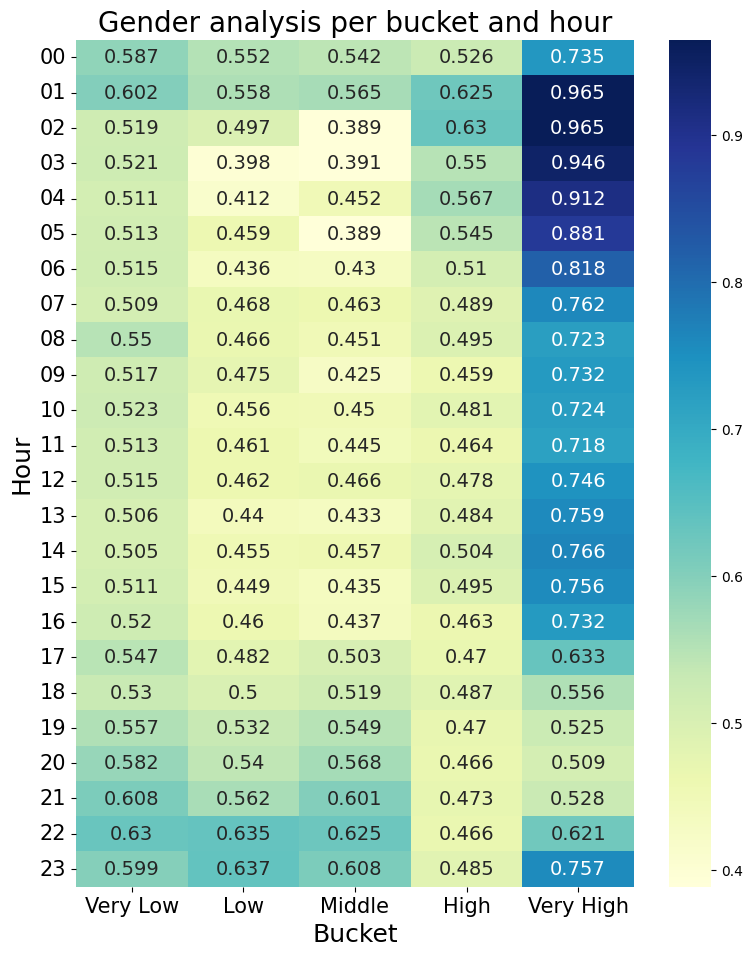

In [ ]:
plot_pivot_table(pivot_table) # выводим данную таблицу

Task 11:

Измените тип поля tr_day на int.
Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.
Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
Выберите верные ответы на вопросы ниже.
Вопросы:
- 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
- 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
- 4) Денежные переводы имеют как минимум 3 явных минимума средних
- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию.

<Axes: xlabel='tr_day'>

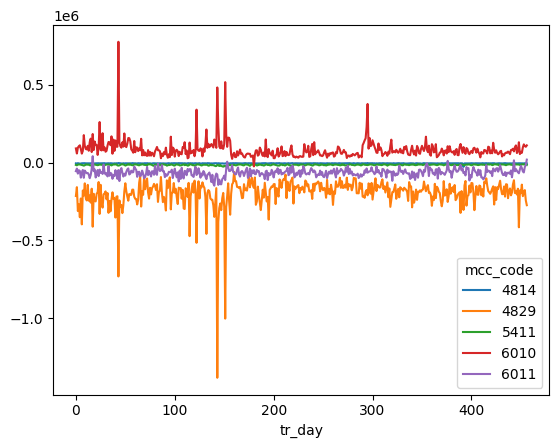

In [ ]:
df['tr_day'] = df['tr_day'].astype(int) # меняем тип поля на int

mcc = df['mcc_code'].value_counts()[df['mcc_code'].value_counts() > 60000].index.tolist() # выбор MCC кодов, встречающихся более чем 60000 раз

df2 = df[df['mcc_code'].isin(mcc)] # создаем новый датафрэйм только с кодами, которые встретились более чем 60000 раз

grouped_df = df2.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack() # группируем данные и получаем средние значение amout

grouped_df.plot() # рисуем

In [ ]:
for code in mcc:
    if code in df['mcc_code'].tolist():
        index = df[df['mcc_code'] == code].index[0]
        print(df.loc[index, 'mcc_description'])
        print(f"Трата: {df.loc[index, 'amount']}")
        print(f"МСС код: {code}")
        avg = df[df['mcc_code'] == code]['amount'].mean()
        print(f"Средняя трата: {avg}")
        print()

print("\nУтверждение 1 - верно")
print("\nУтверждение 2 - верно")
print("\nУтверждение 3 - не верно")
print("\nУтверждение 5 - не верно")

Финансовые институты — снятие наличности автоматически
Трата: 56147.89
МСС код: 6011
Средняя трата: -65086.36053236385

Финансовые институты — снятие наличности вручную
Трата: -227937.99
МСС код: 6010
Средняя трата: 73897.90109085344

Бакалейные магазины, супермаркеты
Трата: -5695.64
МСС код: 5411
Средняя трата: -14983.57264448482

Звонки с использованием телефонов, считывающих магнитную ленту
Трата: -2245.92
МСС код: 4814
Средняя трата: -5411.002382222811

Денежные переводы
Трата: -56147.89
МСС код: 4829
Средняя трата: -199262.08463341714


Утверждение 1 - верно

Утверждение 2 - верно

Утверждение 3 - не верно

Утверждение 5 - не верно
